In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
cd "C:\Users\aijul\Desktop\dataScience-\Real_Estate_Project\dataset"

C:\Users\aijul\Desktop\dataScience-\Real_Estate_Project\dataset


In [38]:
pd.set_option('display.max_columns', None)

In [39]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [40]:
df.shape

(3555, 18)

In [41]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,2.0,37.0
2,flat,tulsiani easy in homes,sector 47,0.40,6723.0,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,2.0,2.0,2,2.0,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [43]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 7,0.45,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0
1,flat,sector 3,0.50,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,2.0,37.0
2,flat,sector 47,0.40,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0
3,flat,sector 61,1.47,2.0,2.0,2,2.0,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0
4,flat,sector 92,0.70,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### luxury score

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='luxury_score'>

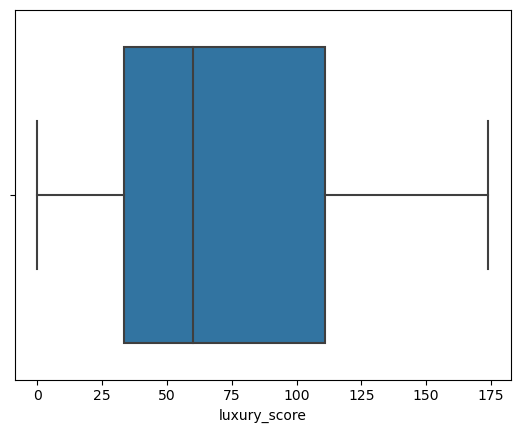

In [44]:
sns.boxplot(df['luxury_score'])

In [45]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [46]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [47]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 7,0.45,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,Low
1,flat,sector 3,0.50,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,2.0,37.0,Low
2,flat,sector 47,0.40,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,Low
3,flat,sector 61,1.47,2.0,2.0,2,2.0,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0,Medium
4,flat,sector 92,0.70,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Low


### floorNum

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floorNum'>

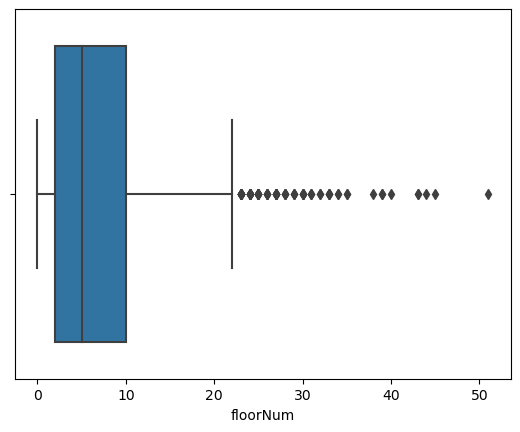

In [48]:
sns.boxplot(df['floorNum'])

In [49]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [50]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [51]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 7,0.45,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,Low,Mid Floor
1,flat,sector 3,0.50,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,2.0,37.0,Low,Low Floor
2,flat,sector 47,0.40,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,Low,High Floor
3,flat,sector 61,1.47,2.0,2.0,2,2.0,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0,Medium,Low Floor
4,flat,sector 92,0.70,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Low,Mid Floor


In [52]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [53]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 7,0.45,2.0,2.0,1,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Mid Floor
1,flat,sector 3,0.50,2.0,2.0,1,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,2.0,Low,Low Floor
2,flat,sector 47,0.40,2.0,2.0,3,New Property,661.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,High Floor
3,flat,sector 61,1.47,2.0,2.0,2,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,Medium,Low Floor
4,flat,sector 92,0.70,2.0,2.0,3,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,Low,Mid Floor


In [54]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['sector 1', 'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 36a', 'sector 37c', 'sector 37d', 'sector 38',
       'sector 39', 'sector 4', 'sector 40', 'sector 41', 'sector 43',
       'sector 45', 'sector 46', 'sector 47', 'sector 47 road',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sector 53', 'sector 54', 'sector 55', 'sector 56',
       'sector 57', 'sector 58', 'sector 59', 'sector 6', 'sec

In [55]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,75.0,2.0,2.0,1.0,3.0,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
1,0.0,31.0,2.0,2.0,1.0,2.0,722.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
2,0.0,48.0,2.0,2.0,3.0,1.0,661.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,65.0,2.0,2.0,2.0,1.0,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
4,0.0,101.0,2.0,2.0,3.0,4.0,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,1.0,60.0,3.0,3.0,3.0,0.0,1650.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0
3551,1.0,28.0,4.0,4.0,3.0,0.0,1800.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0
3552,1.0,27.0,3.0,2.0,3.0,2.0,1350.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3553,1.0,28.0,3.0,3.0,2.0,0.0,1350.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0


In [56]:
y_label

0       0.45
1       0.50
2       0.40
3       1.47
4       0.70
        ... 
3550    4.75
3551    5.50
3552    4.25
3553    4.50
3554    3.25
Name: price, Length: 3555, dtype: float64

### Technique 1 - Correlation Analysis

<AxesSubplot:>

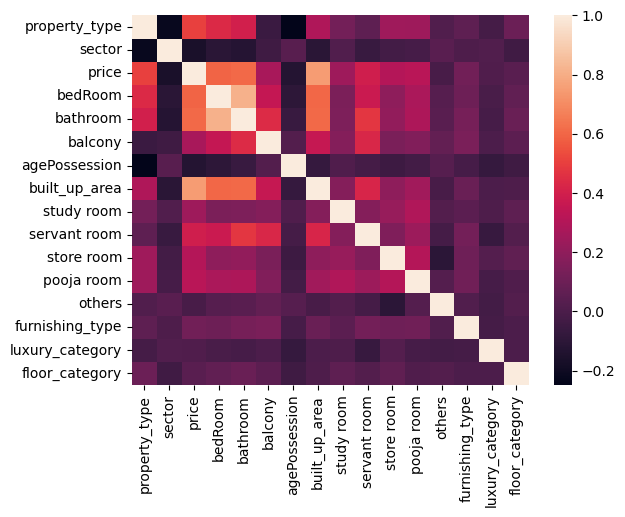

In [57]:
 sns.heatmap(data_label_encoded.corr())

In [58]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.164402
1,price,1.000000
2,bedRoom,0.591099
3,bathroom,0.609717
4,balcony,0.270151
5,agePossession,-0.128359
6,built_up_area,0.748682
7,study room,0.242877
8,servant room,0.391940
9,store room,0.305794


### Technique 2 - Random Forest Feature Importance

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.649696
1,sector,0.102855
0,property_type,0.102495
2,bedRoom,0.025318
3,bathroom,0.024011
8,servant room,0.019570
5,agePossession,0.014414
4,balcony,0.012191
9,store room,0.009998
12,furnishing_type,0.009688


### Technique 3 - Gradient Boosting Feature importances

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.682697
1,sector,0.099179
0,property_type,0.097666
2,bedRoom,0.037951
3,bathroom,0.035724
8,servant room,0.024737
9,store room,0.010543
5,agePossession,0.005608
7,study room,0.002271
12,furnishing_type,0.002083


### Technique 4 - Permutation Importance

In [61]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.755478
0,property_type,0.167655
1,sector,0.133449
8,servant room,0.018769
3,bathroom,0.017541
2,bedRoom,0.012836
7,study room,0.009916
9,store room,0.008468
4,balcony,0.004019
14,floor_category,0.001208


### Technique 5 - LASSO

In [62]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.509930
0,property_type,0.695286
3,bathroom,0.291478
9,store room,0.208814
7,study room,0.182539
8,servant room,0.181993
10,pooja room,0.085923
12,furnishing_type,0.045754
13,luxury_category,0.042600
2,bedRoom,0.022538


### Technique 6 - RFE

In [63]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.649733
0,property_type,0.103059
1,sector,0.101960
3,bathroom,0.025189
2,bedRoom,0.023910
8,servant room,0.020436
5,agePossession,0.014023
4,balcony,0.012127
12,furnishing_type,0.010632
9,store room,0.009905


### Technique 7 - Linear Regression Weights

In [64]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.512537
0,property_type,0.691927
3,bathroom,0.299398
9,store room,0.213515
8,servant room,0.191842
7,study room,0.191575
10,pooja room,0.089240
12,furnishing_type,0.055460
13,luxury_category,0.052823
2,bedRoom,0.025707


### Technique 8 - SHAP

In [65]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [66]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-0.16565231, -0.01018439, -0.05265857, ..., -0.01406665,
        -0.01133649, -0.01014099],
       [-0.18907028,  0.11109486, -0.06179913, ...,  0.03694559,
        -0.00866792, -0.01516579],
       [-0.19739755,  0.0166229 , -0.06280039, ..., -0.01207229,
        -0.00554696,  0.03359214],
       ...,
       [ 1.46642397,  0.64798863, -0.04265046, ..., -0.00459956,
        -0.01275019,  0.0111516 ],
       [ 1.54517551,  0.6081147 , -0.04878998, ..., -0.02659113,
         0.03992833,  0.00357786],
       [ 0.46572337,  0.13209713, -0.96895687, ..., -0.07370389,
         0.01014939,  0.01604803]])

In [67]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.258180
0,property_type,0.485315
1,sector,0.350098
3,bathroom,0.113357
8,servant room,0.093107
2,bedRoom,0.059729
4,balcony,0.037461
12,furnishing_type,0.029230
14,floor_category,0.027912
5,agePossession,0.025665


In [68]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [69]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.164402,0.102855,0.099179,0.133449,-0.070745,0.101960,-0.080146,0.350098
bedRoom,0.591099,0.025318,0.037951,0.012836,0.022538,0.023910,0.025707,0.059729
bathroom,0.609717,0.024011,0.035724,0.017541,0.291478,0.025189,0.299398,0.113357
balcony,0.270151,0.012191,0.001007,0.004019,-0.037346,0.012127,-0.060467,0.037461
agePossession,-0.128359,0.014414,0.005608,-0.023842,-0.022897,0.014023,-0.030679,0.025665
built_up_area,0.748682,0.649696,0.682697,0.755478,1.509930,0.649733,1.512537,1.258180
study room,0.242877,0.008864,0.002271,0.009916,0.182539,0.006899,0.191575,0.019042
servant room,0.391940,0.019570,0.024737,0.018769,0.181993,0.020436,0.191842,0.093107
store room,0.305794,0.009998,0.010543,0.008468,0.208814,0.009905,0.213515,0.022464


In [70]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [71]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.723986
sector             0.129986
bathroom           0.033589
bedRoom            0.027900
servant room       0.027410
store room         0.010754
balcony            0.010123
study room         0.007976
furnishing_type    0.007582
floor_category     0.005851
agePossession      0.004968
luxury_category    0.004749
pooja room         0.003369
others             0.001758
dtype: float64

In [72]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,75.0,2.0,2.0,1.0,3.0,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
1,0.0,31.0,2.0,2.0,1.0,2.0,722.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
2,0.0,48.0,2.0,2.0,3.0,1.0,661.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,65.0,2.0,2.0,2.0,1.0,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
4,0.0,101.0,2.0,2.0,3.0,4.0,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,1.0,60.0,3.0,3.0,3.0,0.0,1650.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0
3551,1.0,28.0,4.0,4.0,3.0,0.0,1800.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0
3552,1.0,27.0,3.0,2.0,3.0,2.0,1350.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3553,1.0,28.0,3.0,3.0,2.0,0.0,1350.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0


In [73]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [74]:
scores.mean()

0.7460281048682745

In [75]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [76]:
scores.mean()

0.7518680601406061

In [77]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [78]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [79]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,75.0,2.0,2.0,1.0,3.0,1000.0,0.0,0.0,1.0,1.0,2.0,0.45
1,0.0,31.0,2.0,2.0,1.0,2.0,722.0,0.0,0.0,2.0,1.0,1.0,0.50
2,0.0,48.0,2.0,2.0,3.0,1.0,661.0,0.0,0.0,1.0,1.0,0.0,0.40
3,0.0,65.0,2.0,2.0,2.0,1.0,1333.0,0.0,0.0,1.0,2.0,1.0,1.47
4,0.0,101.0,2.0,2.0,3.0,4.0,1217.0,0.0,0.0,1.0,1.0,2.0,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,1.0,60.0,3.0,3.0,3.0,0.0,1650.0,0.0,1.0,2.0,2.0,1.0,4.75
3551,1.0,28.0,4.0,4.0,3.0,0.0,1800.0,1.0,0.0,1.0,2.0,1.0,5.50
3552,1.0,27.0,3.0,2.0,3.0,2.0,1350.0,0.0,0.0,1.0,1.0,1.0,4.25
3553,1.0,28.0,3.0,3.0,2.0,0.0,1350.0,1.0,0.0,1.0,2.0,1.0,4.50
